<a href="https://colab.research.google.com/github/ByronFC3/2/blob/main/Final_Python_Cheat_Sheet_for_Market_Data_Analysis_in_2025_With_Automated_Conditional_Email_Alerts_24Aug2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Python Cheat Sheet for Market Data Analysis in 2025

In [1]:
pip install pandas yfinance matplotlib

Load Historical Stock Data

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import math

# Download NVDA data from Jan 1, 2023 to Aug 21, 2025
data = yf.download("NVDA", start="2023-01-01", end="2025-08-21")

# Check for successful data load
if data.empty:
    print("Error: No data downloaded. Check ticker or internet connection.")
else:
    print("Data loaded successfully!")

/tmp/ipython-input-1956612311.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("NVDA", start="2023-01-01", end="2025-08-21")
[*********************100%***********************]  1 of 1 completed

Data loaded successfully!


Try AMC

In [3]:
# Download NVDA data from Jan 1, 2019 to Aug 21, 2021
data2 = yf.download("AMC", start="2019-01-01", end="2021-08-21")

# Check for successful data load
if data.empty:
    print("Error: No data downloaded. Check ticker or internet connection.")
else:
    print("Data loaded successfully!")

/tmp/ipython-input-2881762939.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download("AMC", start="2019-01-01", end="2021-08-21")
[*********************100%***********************]  1 of 1 completed

Data loaded successfully!


In [4]:
# Display the first 5 rows
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2023-01-03  14.302286  14.982682  14.083481  14.837810  401277000
2023-01-04  14.735901  14.839809  14.228353  14.554063  431324000
2023-01-05  14.252332  14.551066  14.135435  14.478131  389168000
2023-01-06  14.845803  14.996669  14.021536  14.461145  405044000
2023-01-09  15.614120  16.041739  15.127552  15.270425  504231000


In [5]:
# Display the first 5 rows
print(data2.head())

Price            Close        High         Low        Open  Volume
Ticker             AMC         AMC         AMC         AMC     AMC
Date                                                              
2019-01-02  119.143242  120.899435  109.992602  111.009339  137490
2019-01-03  120.714577  125.151242  116.740051  118.311371  139240
2019-01-04  125.151237  126.537699  120.344841  122.193456  102500
2019-01-07  130.512222  131.806261  123.579916  125.243672  111920
2019-01-08  134.671600  135.873203  130.234922  131.344102  112270


4. Calculate Key Market Indicators
Let’s compute metrics used by traders and AI algorithms:
Simple Moving Averages (SMA): To spot price trends.
Historical Volatility: To measure risk, critical for 2025’s volatile markets.
Percentile Rank: To gauge if a stock is overbought or oversold.

SMA: The 20-day SMA tracks short-term trends, while the 50-day SMA shows longer-term patterns. Crossovers signal potential buy/sell opportunities, often used in automated trading systems.
Volatility: We annualize the 21-day standard deviation of daily returns (√252 for trading days). High volatility in AI stocks like NVIDIA reflects market uncertainty.
Percentile Rank: A value near 1.0 suggests a stock is at a historical high, useful for spotting overbought conditions in ReFi or tech portfolios.

In [6]:
# NVDA Calculate 20-day and 50-day SMAs
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

# Calculate annualized volatility (21-day window)
data['vol'] = data['Close'].pct_change().rolling(window=21).std() * math.sqrt(252)

# Calculate percentile rank of closing prices (21-day window)
data['pct_rank'] = data['Close'].rolling(window=21).rank(pct=True)

In [7]:
# AMC Calculate 20-day and 50-day SMAs
data2['SMA20'] = data2['Close'].rolling(window=20).mean()
data2['SMA50'] = data2['Close'].rolling(window=50).mean()

# Calculate annualized volatility (21-day window)
data2['vol'] = data2['Close'].pct_change().rolling(window=21).std() * math.sqrt(252)

# Calculate percentile rank of closing prices (21-day window)
data2['pct_rank'] = data2['Close'].rolling(window=21).rank(pct=True)

5. Visualize Trends with Plots
Visuals are key to spotting patterns. Let’s plot NVIDIA’s price and SMAs.

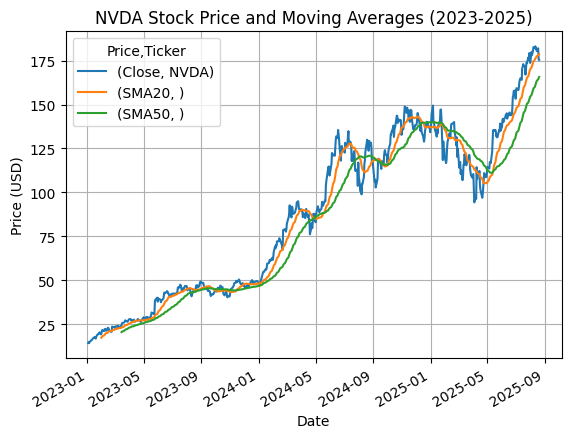

In [8]:
# Plot closing price and moving averages
to_plot = ["Close", "SMA20", "SMA50"]
data[to_plot].plot(title="NVDA Stock Price and Moving Averages (2023-2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

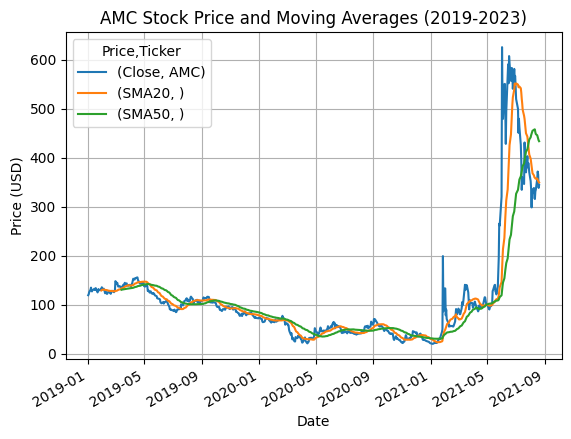

In [10]:
# Plot closing price and moving averages
to_plot = ["Close", "SMA20", "SMA50"]
data2[to_plot].plot(title="AMC Stock Price and Moving Averages (2019-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

What to Look For: A 20-day SMA crossing above the 50-day SMA signals a bullish trend, common in AI-driven stocks like NVIDIA. A cross below suggests a bearish trend.
Next, plot volatility alongside price to assess risk.

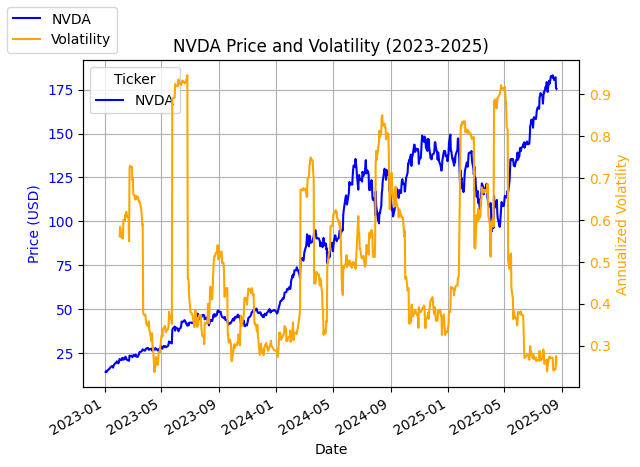

In [11]:
# Plot price and volatility on dual axes
fig, ax1 = plt.subplots()
data["Close"].plot(ax=ax1, label="Close Price", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True)

ax2 = ax1.twinx()
data["vol"].plot(ax=ax2, label="Volatility", color="orange")
ax2.set_ylabel("Annualized Volatility", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

plt.title("NVDA Price and Volatility (2023-2025)")
fig.legend(loc="upper left")
plt.show()

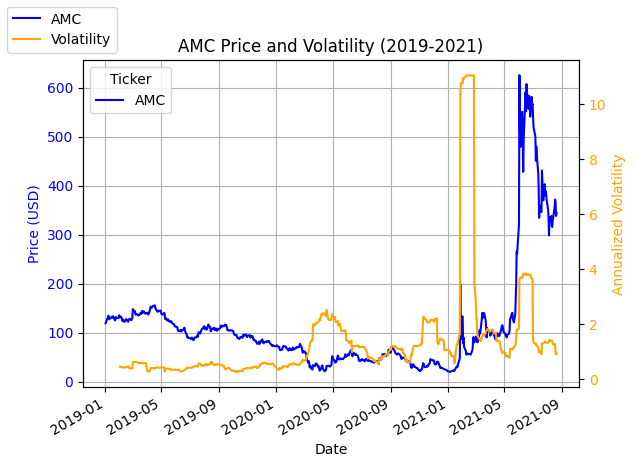

In [14]:
# Plot price and volatility on dual axes
fig, ax1 = plt.subplots()
data2["Close"].plot(ax=ax1, label="Close Price", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True)

ax2 = ax1.twinx()
data2["vol"].plot(ax=ax2, label="Volatility", color="orange")
ax2.set_ylabel("Annualized Volatility", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

plt.title("AMC Price and Volatility (2019-2021)")
fig.legend(loc="upper left")
plt.show()

What to Look For: Spikes in volatility often align with AI sector news (e.g., chip demand surges) or market shocks. Low volatility may indicate stability, appealing for ReFi investors.


Finally, plot the percentile rank.

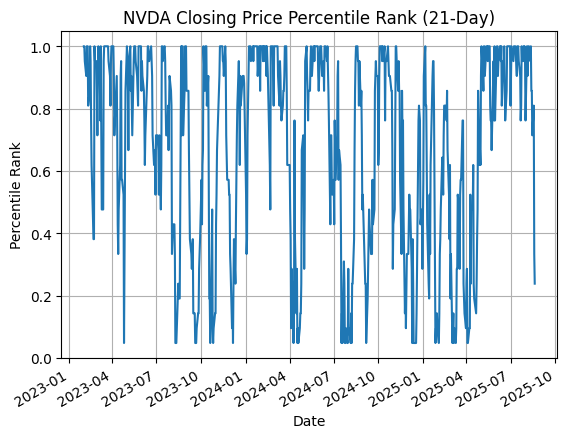

In [15]:
# Plot percentile rank
data["pct_rank"].plot(title="NVDA Closing Price Percentile Rank (21-Day)")
plt.xlabel("Date")
plt.ylabel("Percentile Rank")
plt.grid(True)
plt.show()

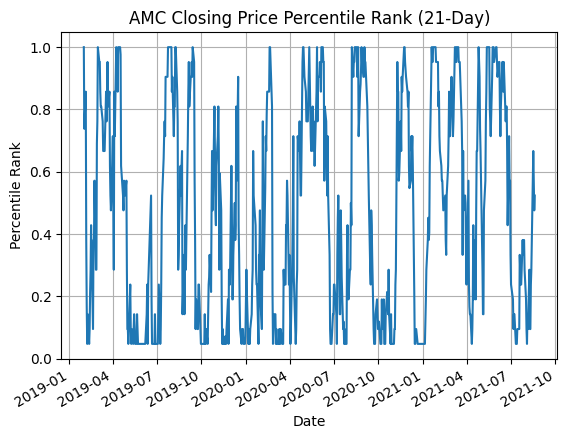

In [16]:
# Plot percentile rank
data2["pct_rank"].plot(title="AMC Closing Price Percentile Rank (21-Day)")
plt.xlabel("Date")
plt.ylabel("Percentile Rank")
plt.grid(True)
plt.show()

What to Look For: A rank near 1.0 suggests NVIDIA is overbought (potential sell signal), while near 0.0 indicates oversold conditions, useful for timing investments in sustainable or AI-focused portfolios

6. Set Up Email Notifications
Let’s add email alerts for two conditions:
Price crosses 50-day SMA: Signals a potential trend change.
Volatility exceeds 0.5: Indicates high risk, common in AI stocks like NVIDIA.

In [26]:
import smtplib
from email.mime.text import MIMEText
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import math


def send_email(subject, body):
    sender = "Byronfair6@gmail.com"  # Replace with your email
    receiver = "Byronfair3@gmail.com"  # Replace with recipient email
    password = "4Jeq:4dPmPbP8BB"  # Use Gmail app-specific password (enable 2FA, generate at myaccount.google.com/security)
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = sender
    msg['To'] = receiver
    try:
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            server.login(sender, password)
            server.send_message(msg)
        print("Email sent successfully!")
    except Exception as e:
        print(f"Error sending email: {e}")

# Check conditions on the latest data point
latest = data.iloc[-1]

# Access the scalar value of the latest closing price using the full tuple key and .item()
latest_close = latest[('Price', 'Close')].item()


if latest_close > latest['SMA50'].item():
    send_email("NVDA Alert: Price Above 50-Day SMA",
               f"NVDA price (${latest_close:.2f}) crossed above 50-day SMA (${latest['SMA50'].item():.2f}) on {data.index[-1].date()}.")
if latest['vol'].item() > 0.5:
    send_email("NVDA Alert: High Volatility",
               f"NVDA volatility ({latest['vol'].item():.2f}) exceeds threshold on {data.index[-1].date()}.")

KeyError: 'key of type tuple not found and not a MultiIndex'

Setup Notes:
Use a Gmail app-specific password (enable 2FA at myaccount.google.com/security).
Replace your_email@gmail.com, receiver_email@gmail.com, and your_app_password.
The script checks the latest day’s data. For real-time alerts, run it periodically (e.g., via Windows Task Scheduler or a cron job).
This system ensures you’re alerted instantly, aligning with 2025’s need for rapid responses in AI-driven markets.


7. Tying It to 2025 Trends
Your analysis doesn’t stop here. In 2025, finance is shaped by:
AI and Machine Learning: Use pandas to preprocess data for AI models predicting stock prices. Try integrating scikit-learn for regression or classification.
Sustainable Investing (ReFi): Combine stock data with ESG metrics (e.g., from Bloomberg) to evaluate NVIDIA’s sustainability, aligning with ReFi’s rise.
Blockchain and DeFi: Analyze tokenized assets or crypto-related stocks (e.g., COIN) using similar pandas techniques, leveraging blockchain’s transparency.

Next Steps
Swap “NVDA” for another ticker (e.g., “TSLA” or “COIN”) to explore different sectors.
Experiment with windows (e.g., 10-day SMA or 30-day volatility) to test sensitivity.
Add indicators like RSI or Bollinger Bands for deeper insights.
Automate your analysis with a daily script, syncing with cloud-based APIs.

Explore pandas’ documentation for more advanced features like merging data, time series analysis, and more.

Why This Matters in 2025
Pandas empowers you to analyze markets at scale, from AI-driven stocks to sustainable investments. With 65% of CFOs using AI for tasks like forecasting and 52% saving $100,000+ annually through automation, these skills are in high demand. Whether you’re optimizing portfolios or building trading bots, Python is your edge in a fast-moving world.